In [ ]:
# Install Required Libraries
!pip install -U numpy==1.26.4 scipy==1.11.4 gensim==4.3.2 \
pandas==2.2.2 nltk==3.8.1 textblob==0.17.1 wordcloud==1.9.3 \
scikit-learn==1.5.2 matplotlib==3.9.2 seaborn==0.13.2 tqdm==4.66.5 \
pymupdf==1.24.9 pdfplumber==0.11.4

In [ ]:
# — Import Libraries
import fitz                      # PyMuPDF
import pdfplumber
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#  Import PDF and Read All Pages
pdf_path = "/content/bpcl-annual-report-2024-25.pdf"

text = ""
with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text += page.extract_text() + " "

print("PDF Loaded Successfully")
print(f"Total length of text: {len(text)} characters")

PDF Loaded Successfully
Total length of text: 1535866 characters


In [ ]:
#  Convert to DataFrame
df = pd.DataFrame({"Text": [text]})
print("Text stored in DataFrame")
df.head()

Text stored in DataFrame


,Text
0,AAnnnnuuaall RReeppoorrtt 22002244--2255\nBhar...


In [ ]:
# Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(txt):
    txt = txt.lower()
    txt = re.sub(r'\d+', '', txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    txt = re.sub(r'\s+', ' ', txt)
    tokens = word_tokenize(txt)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Clean_Text'] = df['Text'].apply(preprocess_text)
print("Text Preprocessing Completed")

Text Preprocessing Completed


100%|██████████| 7991/7991 [00:06<00:00, 1278.80it/s]


Sentiment Analysis Completed


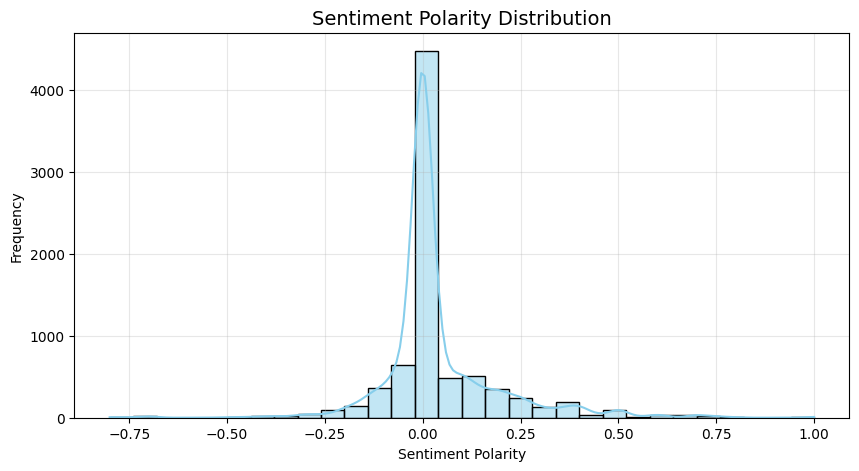

In [ ]:
# Sentence Tokenization + Sentiment Analysis
sentences = sent_tokenize(df['Text'][0])
sentiments = []

for sent in tqdm(sentences):
    blob = TextBlob(sent)
    sentiments.append(blob.sentiment.polarity)

sentiment_df = pd.DataFrame({'Sentence': sentences, 'Sentiment': sentiments})
print("Sentiment Analysis Completed")
sentiment_df.head()

# 📊 Sentiment Distribution
plt.figure(figsize=(10,5))
sns.histplot(sentiment_df['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Sentiment Polarity Distribution", fontsize=14)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Top 20 Frequent Words


,Word,Frequency
0,financial,1252
1,year,1202
2,crore,1030
3,march,887
4,company,834
5,limited,788
6,bpcl,757
7,corporation,741
8,total,615
9,statements,578


/tmp/ipython-input-3167881681.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=freq_df, palette="Blues_r")


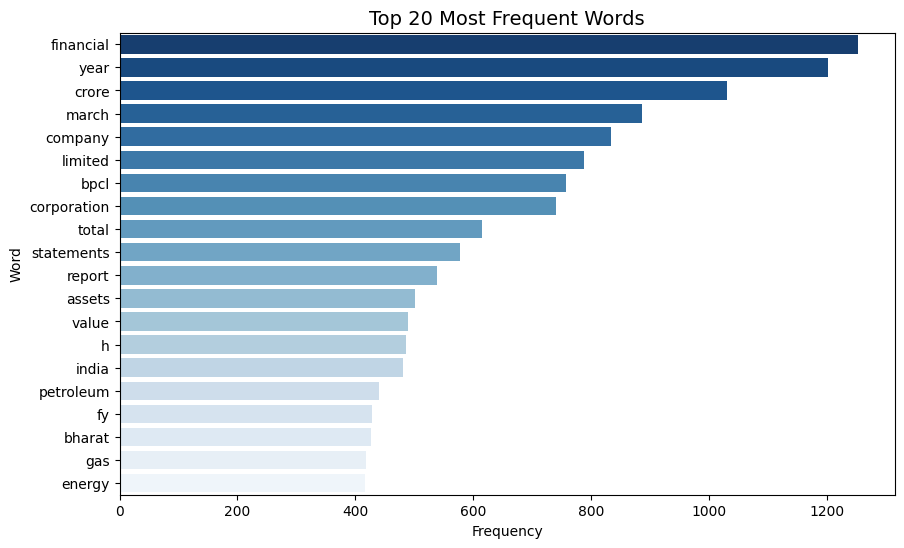

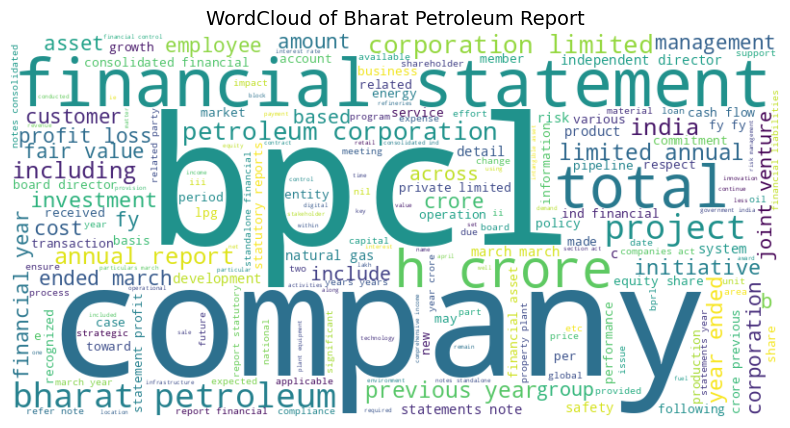

In [ ]:
#  Word Tokenization + Word Frequency + WordCloud
tokens = word_tokenize(df['Clean_Text'][0])
word_freq = nltk.FreqDist(tokens)

# Top 20 frequent words
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
print("Top 20 Frequent Words")
display(freq_df)

# 🔡 Bar Plot for Top 20 Frequent Words
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Word", data=freq_df, palette="Blues_r")
plt.title("Top 20 Most Frequent Words", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# ☁️ WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df['Clean_Text'][0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Bharat Petroleum Report", fontsize=14)
plt.show()


In [ ]:
# TF-IDF or Document-Term Matrix
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(df['Clean_Text'])

print("TF-IDF Matrix Created")
print(f"Shape of TF-IDF Matrix: {X.shape}")

TF-IDF Matrix Created
Shape of TF-IDF Matrix: (1, 2000)


In [ ]:
# Topic Modeling (LDA with Gibbs Sampling)
tokens = [word_tokenize(df['Clean_Text'][0])]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

num_topics = 10
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=20,
                     random_state=42)

print("LDA Model Created (10 Topics)")
topics = lda_model.print_topics(num_words=8)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")


LDA Model Created (10 Topics)
Topic 1: 0.000*"financial" + 0.000*"year" + 0.000*"crore" + 0.000*"company" + 0.000*"limited" + 0.000*"march" + 0.000*"total" + 0.000*"bpcl"
Topic 2: 0.000*"year" + 0.000*"crore" + 0.000*"financial" + 0.000*"company" + 0.000*"bpcl" + 0.000*"march" + 0.000*"limited" + 0.000*"h"
Topic 3: 0.009*"financial" + 0.009*"year" + 0.007*"crore" + 0.006*"march" + 0.006*"company" + 0.006*"limited" + 0.006*"bpcl" + 0.005*"corporation"
Topic 4: 0.000*"year" + 0.000*"financial" + 0.000*"bpcl" + 0.000*"company" + 0.000*"limited" + 0.000*"march" + 0.000*"crore" + 0.000*"h"
Topic 5: 0.000*"financial" + 0.000*"year" + 0.000*"limited" + 0.000*"crore" + 0.000*"march" + 0.000*"company" + 0.000*"report" + 0.000*"corporation"
Topic 6: 0.000*"financial" + 0.000*"company" + 0.000*"march" + 0.000*"year" + 0.000*"bpcl" + 0.000*"limited" + 0.000*"crore" + 0.000*"total"
Topic 7: 0.000*"year" + 0.000*"financial" + 0.000*"march" + 0.000*"company" + 0.000*"corporation" + 0.000*"total" + 0.

/tmp/ipython-input-2482763593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=freq_df, palette="Greens_r")


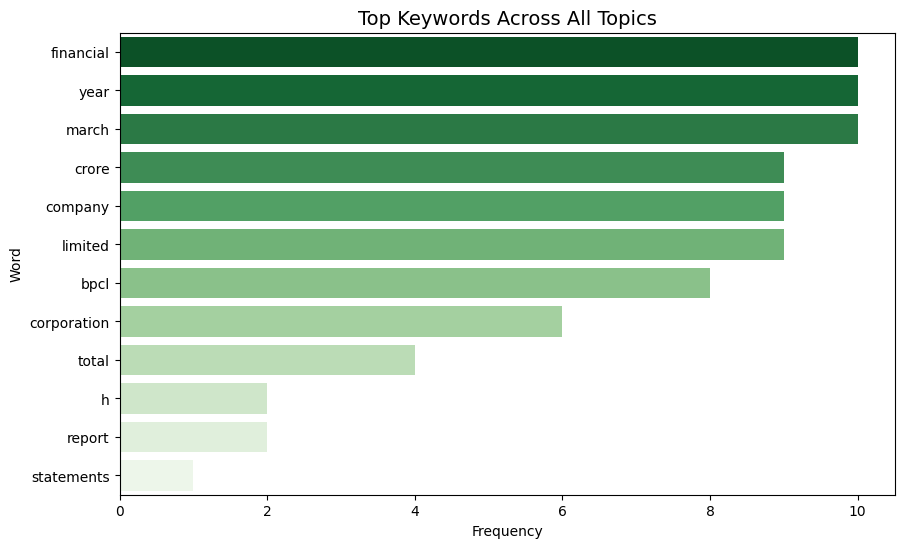

In [ ]:
#  Visualize Topic Keywords
topic_words = []
for t in topics:
    words = re.findall(r'"(.*?)"', t[1])
    topic_words.extend(words)

freq_dist = nltk.FreqDist(topic_words)
freq_df = pd.DataFrame(freq_dist.most_common(20), columns=["Word", "Frequency"])

plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Word", data=freq_df, palette="Greens_r")
plt.title("Top Keywords Across All Topics", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
